In [1]:
import pandas as pd
import numpy as np

# Observation Data: Contains COVID-19 status

In [2]:
observations_df = pd.read_csv('C:\\Projects\\healthdata\\train\\observations.csv')

In [3]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20656425 entries, 0 to 20656424
Data columns (total 8 columns):
DATE           object
PATIENT        object
ENCOUNTER      object
CODE           object
DESCRIPTION    object
VALUE          object
UNITS          object
TYPE           object
dtypes: object(8)
memory usage: 1.2+ GB


In [4]:
observations_df.shape

(20656425, 8)

# Creating subsets of observation data based on CODE and VALUE

In [5]:
covid19_status_df = observations_df.loc[(observations_df['CODE'] == '94531-1')]

In [6]:
covid19_status_df.shape

(105548, 8)

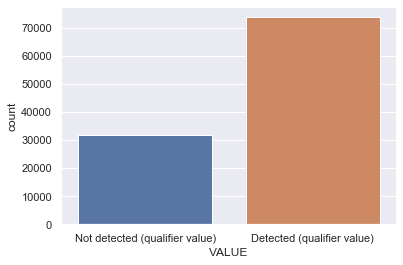

In [8]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="VALUE", data=covid19_status_df)

Subset based on CODE and VALUE of 'Detected'

In [9]:
covid19_status2_df = observations_df.loc[(observations_df['CODE'] == '94531-1') & (observations_df['VALUE'].str.contains('Detected'))]

In [10]:
covid19_status2_df.shape

(73697, 8)

# Patient Data

In [11]:
patients_df = pd.read_csv('C:\\Projects\\healthdata\\train\\patients.csv')

In [12]:
patients_df.shape

(117959, 25)

In [13]:
patients_df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

# Create subset of patient data that only includes the following columns:
    Id, BIRTHDATE, DEATHDATE, MARITAL, RACE, ETHNICITY, GENDER, CITY, STATE, HEALTHCARE_COVERAGE

In [14]:
patients_subset_df = pd.DataFrame([patients_df.Id, patients_df.BIRTHDATE, patients_df.DEATHDATE, patients_df.MARITAL, patients_df.RACE, patients_df.ETHNICITY, patients_df.GENDER, patients_df.CITY, patients_df.STATE, patients_df.HEALTHCARE_COVERAGE]).transpose()

In [15]:
patients_subset_df.shape

(117959, 10)

# Create another subset of data that only includes COVID-19 patients

In [16]:
covid19_patients_df = patients_subset_df.loc[(patients_subset_df['Id'].isin(covid19_status2_df['PATIENT']))]

In [17]:
covid19_patients_df.shape

(73697, 10)

# Look at different groupings of data using plots.

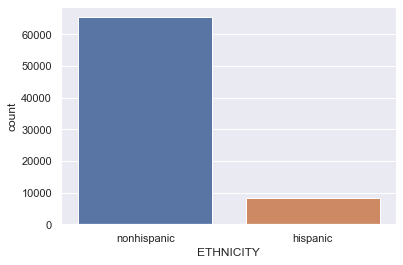

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="ETHNICITY", data=covid19_patients_df)

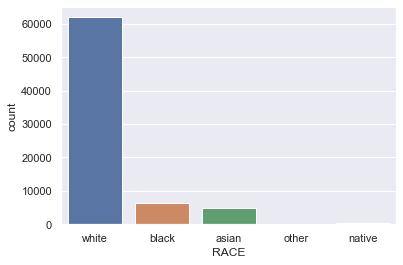

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="RACE", data=covid19_patients_df)

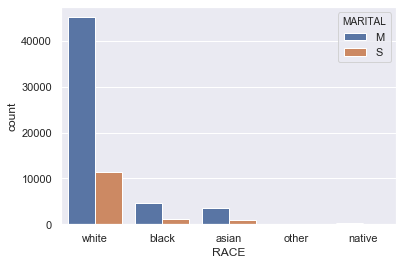

In [20]:
ax = sns.countplot(x="RACE", hue = "MARITAL", data=covid19_patients_df)

In [21]:
covid19_patients_df.groupby(['HEALTHCARE_COVERAGE']).count()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE
HEALTHCARE_COVERAGE,,,,,,,,,
0.00,1606,1606,52,1327,1606,1606,1606,1606,1606
49.16,1,1,0,0,1,1,1,1,1
69.16,13,13,1,12,13,13,13,13,13
89.16,4,4,0,4,4,4,4,4,4
98.32,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1354660.73,1,1,0,1,1,1,1,1,1
1360456.77,1,1,0,1,1,1,1,1,1
1367572.64,1,1,1,1,1,1,1,1,1


In [22]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 3 to 117956
Data columns (total 10 columns):
Id                     73697 non-null object
BIRTHDATE              73697 non-null object
DEATHDATE              5568 non-null object
MARITAL                67360 non-null object
RACE                   73697 non-null object
ETHNICITY              73697 non-null object
GENDER                 73697 non-null object
CITY                   73697 non-null object
STATE                  73697 non-null object
HEALTHCARE_COVERAGE    73697 non-null object
dtypes: object(10)
memory usage: 8.7+ MB


# Encounters Data: Contains hospitalizations

In [23]:
encounters_df = pd.read_csv('C:\\Projects\\healthdata\\train\\encounters.csv')

In [24]:
encounters_df.shape

(6023703, 15)

In [25]:
encounters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6023703 entries, 0 to 6023702
Data columns (total 15 columns):
Id                     object
START                  object
STOP                   object
PATIENT                object
ORGANIZATION           object
PROVIDER               object
PAYER                  object
ENCOUNTERCLASS         object
CODE                   int64
DESCRIPTION            object
BASE_ENCOUNTER_COST    float64
TOTAL_CLAIM_COST       float64
PAYER_COVERAGE         float64
REASONCODE             float64
REASONDESCRIPTION      object
dtypes: float64(4), int64(1), object(10)
memory usage: 689.4+ MB


Create DataFrame with only COVID-19 hospitalizations.

In [26]:
covid19_hosp_df = encounters_df.loc[(encounters_df['REASONCODE'] == 840539006)] 

In [27]:
covid19_hosp_df.shape

(31883, 15)

Create a subset DataFrame that only contains the following columns: Id, START, STOP, PATIENT, CODE, DESCRIPTION, REASONCODE, REASONDESCRIPTION.

In [28]:
covid19_hosp_subset_df = pd.DataFrame([covid19_hosp_df.Id, covid19_hosp_df.START, covid19_hosp_df.STOP, covid19_hosp_df.PATIENT, covid19_hosp_df.CODE, covid19_hosp_df.DESCRIPTION, covid19_hosp_df.REASONCODE, covid19_hosp_df.REASONDESCRIPTION]).transpose()

In [29]:
covid19_hosp_subset_df.shape

(31883, 8)

In [30]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 8 columns):
Id                   31883 non-null object
START                31883 non-null object
STOP                 31883 non-null object
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: object(8)
memory usage: 3.4+ MB


# Encounters data: ICU Admissions

In [31]:
covid19_icu_df = covid19_hosp_subset_df.loc[(covid19_hosp_subset_df['CODE'] == 305351004)]

In [32]:
covid19_icu_df.shape

(4981, 8)

In [33]:
covid19_icu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4981 entries, 296 to 6022720
Data columns (total 8 columns):
Id                   4981 non-null object
START                4981 non-null object
STOP                 4981 non-null object
PATIENT              4981 non-null object
CODE                 4981 non-null object
DESCRIPTION          4981 non-null object
REASONCODE           4981 non-null object
REASONDESCRIPTION    4981 non-null object
dtypes: object(8)
memory usage: 350.2+ KB


# Procedures Data: Contains controlled ventilation data for patients.

In [34]:
procedures_df = pd.read_csv('C:\\Projects\\healthdata\\train\\procedures.csv')

In [35]:
procedures_df.shape

(1298614, 8)

In [36]:
procedures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298614 entries, 0 to 1298613
Data columns (total 8 columns):
DATE                 1298614 non-null object
PATIENT              1298614 non-null object
ENCOUNTER            1298614 non-null object
CODE                 1298614 non-null int64
DESCRIPTION          1298614 non-null object
BASE_COST            1298614 non-null float64
REASONCODE           878387 non-null float64
REASONDESCRIPTION    878387 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 79.3+ MB


# Look at data only for COVID-19 patients who need controlled ventilation

In [37]:
covid19_procedures_df = procedures_df.loc[(procedures_df['PATIENT'].isin(covid19_status2_df['PATIENT']))]

In [38]:
covid19_procedures_df.shape

(924752, 8)

In [39]:
covid19_controlvent_df = covid19_procedures_df.loc[(covid19_procedures_df['CODE'] == 26763009)]

In [40]:
covid19_controlvent_df.shape

(28920, 8)

# Insert column containing number of days hospitalized into the COVID-19 hospital dataframe.

In [41]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 8 columns):
Id                   31883 non-null object
START                31883 non-null object
STOP                 31883 non-null object
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: object(8)
memory usage: 3.4+ MB


In [42]:
covid19_hosp_subset_df['START'] = pd.to_datetime(covid19_hosp_subset_df['START'])
covid19_hosp_subset_df['STOP'] = pd.to_datetime(covid19_hosp_subset_df['STOP'])

In [43]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 8 columns):
Id                   31883 non-null object
START                31883 non-null datetime64[ns, UTC]
STOP                 31883 non-null datetime64[ns, UTC]
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 3.4+ MB


In [44]:
covid19_hosp_subset_df.insert(3, 'DAYSHOSPITALIZED', (covid19_hosp_subset_df['STOP'] - covid19_hosp_subset_df['START']))

In [45]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 9 columns):
Id                   31883 non-null object
START                31883 non-null datetime64[ns, UTC]
STOP                 31883 non-null datetime64[ns, UTC]
DAYSHOSPITALIZED     31883 non-null timedelta64[ns]
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: datetime64[ns, UTC](2), object(6), timedelta64[ns](1)
memory usage: 3.7+ MB


Created a DataFrame that contained data based on the Encounters 
DESCRIPTION column containing the words "Death Certification"

In [46]:
covid19_hosp_deaths_df = covid19_hosp_subset_df.loc[(covid19_hosp_subset_df['DESCRIPTION'].str.contains('Death Certification'))]
covid19_hosp_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5325 entries, 297 to 6022721
Data columns (total 9 columns):
Id                   5325 non-null object
START                5325 non-null datetime64[ns, UTC]
STOP                 5325 non-null datetime64[ns, UTC]
DAYSHOSPITALIZED     5325 non-null timedelta64[ns]
PATIENT              5325 non-null object
CODE                 5325 non-null object
DESCRIPTION          5325 non-null object
REASONCODE           5325 non-null object
REASONDESCRIPTION    5325 non-null object
dtypes: datetime64[ns, UTC](2), object(6), timedelta64[ns](1)
memory usage: 416.0+ KB


In [47]:
covid19_hosp_deaths_df.shape

(5325, 9)

In [48]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 9 columns):
Id                   31883 non-null object
START                31883 non-null datetime64[ns, UTC]
STOP                 31883 non-null datetime64[ns, UTC]
DAYSHOSPITALIZED     31883 non-null timedelta64[ns]
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: datetime64[ns, UTC](2), object(6), timedelta64[ns](1)
memory usage: 3.7+ MB


In [49]:
covid19_hosp_subset_df['DAYSHOSPITALIZED'].describe()

count                     31883
mean     9 days 06:47:10.600633
std      6 days 08:20:53.069331
min             0 days 00:15:00
25%             4 days 03:07:00
50%             9 days 05:15:00
75%            14 days 06:36:00
max            21 days 11:58:00
Name: DAYSHOSPITALIZED, dtype: object

In [50]:
import matplotlib.pyplot as plt

In [51]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 3 to 117956
Data columns (total 10 columns):
Id                     73697 non-null object
BIRTHDATE              73697 non-null object
DEATHDATE              5568 non-null object
MARITAL                67360 non-null object
RACE                   73697 non-null object
ETHNICITY              73697 non-null object
GENDER                 73697 non-null object
CITY                   73697 non-null object
STATE                  73697 non-null object
HEALTHCARE_COVERAGE    73697 non-null object
dtypes: object(10)
memory usage: 8.7+ MB


In [52]:
covid19_hosp_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31883 entries, 74 to 6022721
Data columns (total 9 columns):
Id                   31883 non-null object
START                31883 non-null datetime64[ns, UTC]
STOP                 31883 non-null datetime64[ns, UTC]
DAYSHOSPITALIZED     31883 non-null timedelta64[ns]
PATIENT              31883 non-null object
CODE                 31883 non-null object
DESCRIPTION          31883 non-null object
REASONCODE           31883 non-null object
REASONDESCRIPTION    31883 non-null object
dtypes: datetime64[ns, UTC](2), object(6), timedelta64[ns](1)
memory usage: 3.7+ MB


Adding DAYSHOSPITALIZED to COVID-19 patients dataframe

In [53]:
covid19_patients_df = pd.merge(covid19_patients_df, covid19_hosp_subset_df[['DAYSHOSPITALIZED', 'PATIENT']], how='left', left_on='Id', right_on='PATIENT')
covid19_patients_df.drop(columns='PATIENT', inplace = True)

In [54]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 11 columns):
Id                     85160 non-null object
BIRTHDATE              85160 non-null object
DEATHDATE              14687 non-null object
MARITAL                78556 non-null object
RACE                   85160 non-null object
ETHNICITY              85160 non-null object
GENDER                 85160 non-null object
CITY                   85160 non-null object
STATE                  85160 non-null object
HEALTHCARE_COVERAGE    85160 non-null object
DAYSHOSPITALIZED       31865 non-null timedelta64[ns]
dtypes: object(10), timedelta64[ns](1)
memory usage: 7.8+ MB


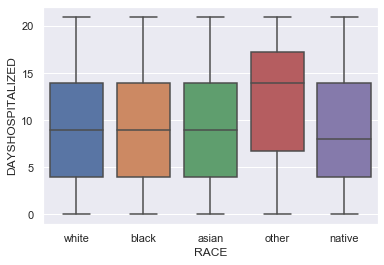

In [55]:
# Boxplot of attribute DAYSHOSPITALIZED segregated by GENDER
sns.boxplot(x = covid19_patients_df['RACE'], y = covid19_patients_df['DAYSHOSPITALIZED'].dt.days)

Add column to covid19_patients_df to track patients who survived: '1' = survived, '0' = died

In [56]:
covid19_patients_df["SURVIVAL"] = covid19_patients_df["DEATHDATE"].apply(lambda x: "1" if pd.isnull(x) else "0")

In [57]:
covid19_patients_df.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,HEALTHCARE_COVERAGE,DAYSHOSPITALIZED,SURVIVAL
0,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaN,M,white,nonhispanic,F,Wakefield,Massachusetts,8128.09,NaT,1
1,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaN,S,white,nonhispanic,M,Weston,Massachusetts,0,17 days 07:17:00,1
2,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaN,M,white,nonhispanic,F,Millville,Massachusetts,12704.1,20 days 07:47:00,1
3,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaN,NaN,black,nonhispanic,M,Boston,Massachusetts,8129.28,NaT,1
4,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaN,M,white,hispanic,F,Boston,Massachusetts,1659.84,NaT,1


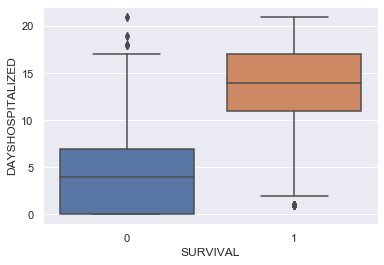

In [58]:
sns.boxplot(x = covid19_patients_df['SURVIVAL'], y = covid19_patients_df['DAYSHOSPITALIZED'].dt.days)

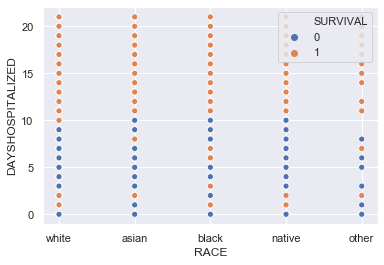

In [59]:
sns.scatterplot(x = covid19_patients_df['RACE'], y = covid19_patients_df['DAYSHOSPITALIZED'].dt.days, hue = covid19_patients_df['SURVIVAL'])

In [60]:
covid19_patients_df.describe()

,DAYSHOSPITALIZED
count,31865
mean,9 days 06:52:33.491918
std,6 days 08:20:11.657289
min,0 days 00:15:00
25%,4 days 03:08:00
50%,9 days 05:15:00
75%,14 days 06:38:00
max,21 days 11:58:00


# Conditions Data: Contains other conditions a patient might have.

In [61]:
conditions_df = pd.read_csv('C:\\Projects\\healthdata\\train\\conditions.csv')

In [62]:
conditions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362601 entries, 0 to 1362600
Data columns (total 6 columns):
START          1362601 non-null object
STOP           529042 non-null object
PATIENT        1362601 non-null object
ENCOUNTER      1362601 non-null object
CODE           1362601 non-null int64
DESCRIPTION    1362601 non-null object
dtypes: int64(1), object(5)
memory usage: 62.4+ MB


In [63]:
conditions_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1995-08-22,NaN,93fa6213-73a1-4cce-b408-9986a4145801,4487de56-f20a-422d-a2f6-aa15dcd1cd6d,53741008,Coronary Heart Disease
1,2000-12-20,2000-12-27,93fa6213-73a1-4cce-b408-9986a4145801,d0105ca5-d725-44e9-aaee-51f0e04392e4,195662009,Acute viral pharyngitis (disorder)
2,2001-12-04,NaN,93fa6213-73a1-4cce-b408-9986a4145801,1123f059-daf8-4a9e-be5f-e1eee5fcdb48,22298006,Myocardial Infarction
3,2001-12-04,NaN,93fa6213-73a1-4cce-b408-9986a4145801,1123f059-daf8-4a9e-be5f-e1eee5fcdb48,399211009,History of myocardial infarction (situation)
4,2016-11-09,NaN,53bbfa41-5cab-422e-a8a7-8fa3ae55ed71,fdedb884-d844-420a-9ec7-5d6cab4ffd02,370143000,Major depression disorder


In [64]:
diabetes_status_df = conditions_df.loc[(conditions_df['CODE'] == 44054006)]

In [65]:
diabetes_status_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
26,2002-09-22,NaN,90031c21-e8a4-416e-b60b-23e871ee62dc,77b632e7-76b9-4a24-a740-8db88ebbefa7,44054006,Diabetes
119,1983-07-15,NaN,c58ae02e-235e-4db2-a9c3-6926e9c0c5fa,30681ab2-b56c-454f-b5d9-b362460ce9cd,44054006,Diabetes
207,1983-08-17,NaN,614a610f-bd80-4721-a6f7-16d77b23b12e,b60c018f-93d4-4bf8-a03f-bfd34a8d14d1,44054006,Diabetes
233,1978-11-10,NaN,6348ae8c-a92f-40c5-9d59-d441bc540e6d,fb40a4d1-0f86-4621-a905-bc2cbc697586,44054006,Diabetes
254,2005-08-17,NaN,a8b30568-384b-45b5-b747-c096be9d6181,c386e184-654f-4956-a936-906d8f313a84,44054006,Diabetes


In [66]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 12 columns):
Id                     85160 non-null object
BIRTHDATE              85160 non-null object
DEATHDATE              14687 non-null object
MARITAL                78556 non-null object
RACE                   85160 non-null object
ETHNICITY              85160 non-null object
GENDER                 85160 non-null object
CITY                   85160 non-null object
STATE                  85160 non-null object
HEALTHCARE_COVERAGE    85160 non-null object
DAYSHOSPITALIZED       31865 non-null timedelta64[ns]
SURVIVAL               85160 non-null object
dtypes: object(11), timedelta64[ns](1)
memory usage: 10.9+ MB


In [67]:
covid19_patients_df = pd.merge(covid19_patients_df, diabetes_status_df[['DESCRIPTION', 'PATIENT']], how='left', left_on='Id', right_on='PATIENT')
covid19_patients_df.drop(columns='PATIENT', inplace = True)

In [68]:
covid19_patients_df.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,HEALTHCARE_COVERAGE,DAYSHOSPITALIZED,SURVIVAL,DESCRIPTION
0,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaN,M,white,nonhispanic,F,Wakefield,Massachusetts,8128.09,NaT,1,NaN
1,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaN,S,white,nonhispanic,M,Weston,Massachusetts,0,17 days 07:17:00,1,NaN
2,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaN,M,white,nonhispanic,F,Millville,Massachusetts,12704.1,20 days 07:47:00,1,Diabetes
3,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaN,NaN,black,nonhispanic,M,Boston,Massachusetts,8129.28,NaT,1,NaN
4,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaN,M,white,hispanic,F,Boston,Massachusetts,1659.84,NaT,1,NaN


In [69]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 13 columns):
Id                     85160 non-null object
BIRTHDATE              85160 non-null object
DEATHDATE              14687 non-null object
MARITAL                78556 non-null object
RACE                   85160 non-null object
ETHNICITY              85160 non-null object
GENDER                 85160 non-null object
CITY                   85160 non-null object
STATE                  85160 non-null object
HEALTHCARE_COVERAGE    85160 non-null object
DAYSHOSPITALIZED       31865 non-null timedelta64[ns]
SURVIVAL               85160 non-null object
DESCRIPTION            17807 non-null object
dtypes: object(12), timedelta64[ns](1)
memory usage: 9.1+ MB


In [70]:
covid19_patients_df['DAYSHOSPITALIZED'].mean()

Timedelta('9 days 06:52:33.491918')

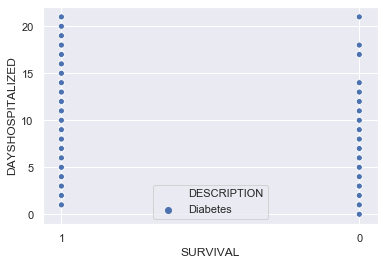

In [71]:
sns.scatterplot(x = covid19_patients_df['SURVIVAL'], y = covid19_patients_df['DAYSHOSPITALIZED'].dt.days, hue = covid19_patients_df['DESCRIPTION'])

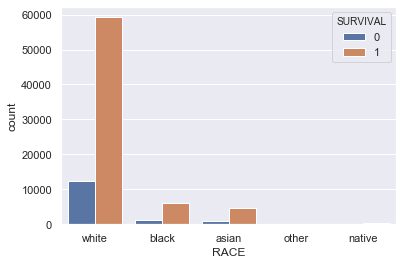

In [72]:
sns.set(style="darkgrid")
ax = sns.countplot(x="RACE", hue="SURVIVAL", data=covid19_patients_df)

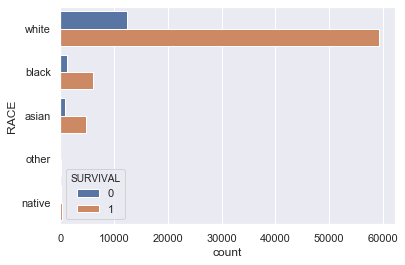

In [73]:
ax = sns.countplot(y="RACE", hue="SURVIVAL", data=covid19_patients_df)

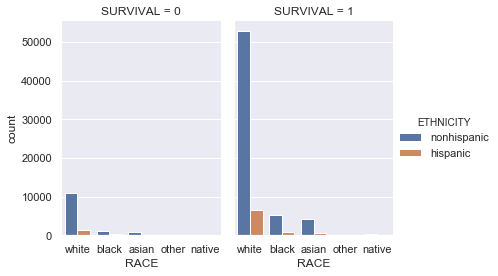

In [74]:
g = sns.catplot(x="RACE", hue="ETHNICITY", col="SURVIVAL",
                data=covid19_patients_df, kind="count",
                height=4, aspect=.7);

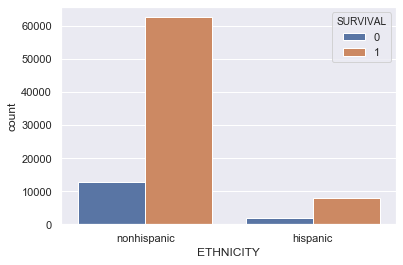

In [75]:
ax = sns.countplot(x="ETHNICITY", hue="SURVIVAL", data=covid19_patients_df)

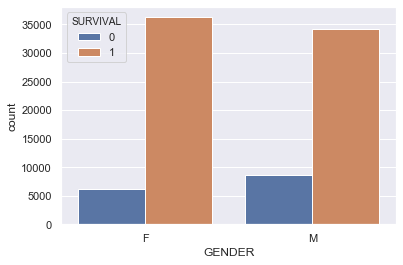

In [76]:
ax = sns.countplot(x="GENDER", hue="SURVIVAL", data=covid19_patients_df)

Add column to covid19_patients_df to track patients who have Diabetes: '1' = Diabetes, '0' = Does Not have Diabetes

In [77]:
covid19_patients_df["DIABETES"] = covid19_patients_df["DESCRIPTION"].apply(lambda x: "0" if pd.isnull(x) else "1")

In [78]:
covid19_patients_df.head()

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,HEALTHCARE_COVERAGE,DAYSHOSPITALIZED,SURVIVAL,DESCRIPTION,DIABETES
0,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaN,M,white,nonhispanic,F,Wakefield,Massachusetts,8128.09,NaT,1,NaN,0
1,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaN,S,white,nonhispanic,M,Weston,Massachusetts,0,17 days 07:17:00,1,NaN,0
2,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaN,M,white,nonhispanic,F,Millville,Massachusetts,12704.1,20 days 07:47:00,1,Diabetes,1
3,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaN,NaN,black,nonhispanic,M,Boston,Massachusetts,8129.28,NaT,1,NaN,0
4,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaN,M,white,hispanic,F,Boston,Massachusetts,1659.84,NaT,1,NaN,0


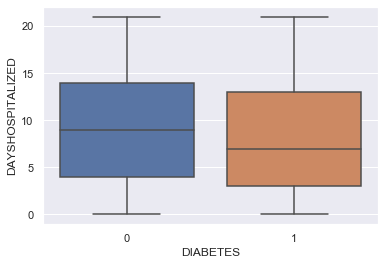

In [79]:
sns.boxplot(x = covid19_patients_df['DIABETES'], y = covid19_patients_df['DAYSHOSPITALIZED'].dt.days)

SURVIVAL Means: '1' = survived, '0' = died
    
DIABETES Means: '1' = Diabetes, '0' = Does Not have Diabetes

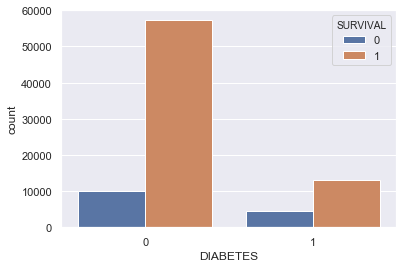

In [80]:
ax = sns.countplot(x="DIABETES", hue="SURVIVAL", data=covid19_patients_df)

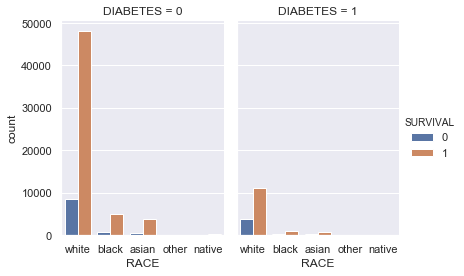

In [81]:
g = sns.catplot(x="RACE", hue="SURVIVAL", col="DIABETES",
                data=covid19_patients_df, kind="count",
                height=4, aspect=.7);

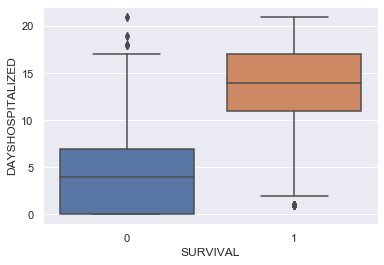

In [82]:
sns.boxplot(x = covid19_patients_df['SURVIVAL'], y = covid19_patients_df['DAYSHOSPITALIZED'].dt.days)

In [83]:
covid19_patients_df.groupby(['RACE','SURVIVAL'])['Id'].count()

RACE    SURVIVAL
asian   0             952
        1            4734
black   0            1251
        1            6019
native  0              92
        1             389
other   0               9
        1              84
white   0           12383
        1           59247
Name: Id, dtype: int64

In [84]:
covid19_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85160 entries, 0 to 85159
Data columns (total 14 columns):
Id                     85160 non-null object
BIRTHDATE              85160 non-null object
DEATHDATE              14687 non-null object
MARITAL                78556 non-null object
RACE                   85160 non-null object
ETHNICITY              85160 non-null object
GENDER                 85160 non-null object
CITY                   85160 non-null object
STATE                  85160 non-null object
HEALTHCARE_COVERAGE    85160 non-null object
DAYSHOSPITALIZED       31865 non-null timedelta64[ns]
SURVIVAL               85160 non-null object
DESCRIPTION            17807 non-null object
DIABETES               85160 non-null object
dtypes: object(13), timedelta64[ns](1)
memory usage: 12.2+ MB
